In [1]:
import pandas as pd

ground_truth = pd.read_csv("C:\\Users\\Serj\\Documents\\Gender_Prediction\\ground_truth_ml.csv")
variables = pd.read_csv("C:\\Users\\Serj\\Documents\\Gender_Prediction\\variables_ml.csv")

In [2]:
combined_data = pd.merge(ground_truth, variables, on='id', how='inner')


In [3]:
print(combined_data.isnull().sum())

combined_data = combined_data.dropna()


id         0
gender     0
ds         0
h          0
content    0
dtype: int64


In [4]:
combined_counts = combined_data['gender'].value_counts()

print(combined_counts)

gender
f    385856
m     99442
Name: count, dtype: int64


In [5]:
combined_data['ds'] = pd.to_datetime(combined_data['ds']).astype('int64') //  10**9


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

combined_data['content'] = encoder.fit_transform(combined_data['content'])



In [7]:
combined_data


,id,gender,ds,h,content
0,9933667c-5b9c-4e80-a276-78aba991ceb6,f,1682380800,22,508
1,9933667c-5b9c-4e80-a276-78aba991ceb6,f,1681257600,21,38
2,9933667c-5b9c-4e80-a276-78aba991ceb6,f,1682380800,22,621
3,9933667c-5b9c-4e80-a276-78aba991ceb6,f,1681257600,22,508
4,9933667c-5b9c-4e80-a276-78aba991ceb6,f,1680912000,14,712
...,...,...,...,...,...
485293,64da0f76-3804-4b61-8b00-6b923f1c448d,f,1680912000,9,760
485294,e76d941e-5ada-4c94-9424-be59ed27930d,f,1680393600,20,712
485295,0fe56e26-3cea-4d12-b3cc-f9677c3db177,f,1681948800,18,21
485296,26131393-ae39-44f8-b9d7-0eca0a0e6cbe,f,1681257600,18,566


In [8]:
from sklearn.model_selection import train_test_split

X = combined_data.drop(['id', 'gender'], axis=1)
y = combined_data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.7769730063878013


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           f       0.80      0.95      0.87     76996
           m       0.37      0.12      0.18     20064

    accuracy                           0.78     97060
   macro avg       0.59      0.53      0.52     97060
weighted avg       0.72      0.78      0.73     97060



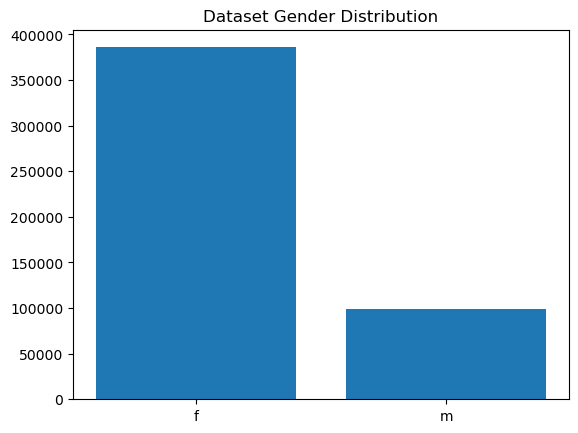

In [12]:
import matplotlib.pyplot as plt

plt.bar(combined_data['gender'].unique(), combined_data['gender'].value_counts())
plt.title('Dataset Gender Distribution')
plt.show()


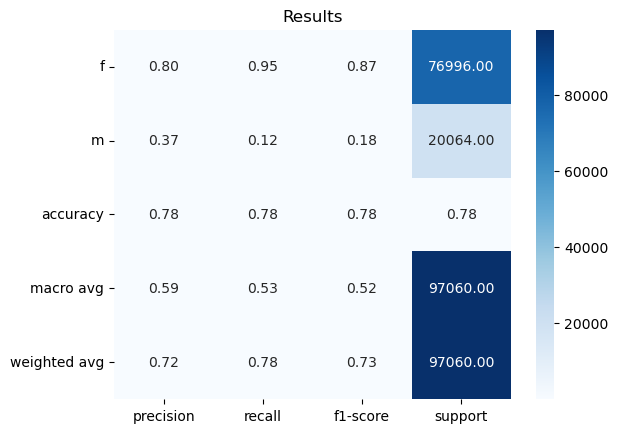

In [13]:
from sklearn.metrics import classification_report
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df, annot=True, fmt=".2f", cmap="Blues")

plt.title('Results')
plt.show()